## EDA Notebook

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [671]:
df = pd.read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 1/Phase 1 Project/Phase-1-Project/Clean Data Only/Clean_Aviation_Data_Final.csv', index_col= 'Event Date')

In [672]:
df.columns

Index(['Unnamed: 0', 'Investigation Type', 'Location', 'Country',
       'Airport Name', 'Injury Severity', 'Aircraft Damage', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Total Passengers', 'Make-Model'],
      dtype='object')

In [673]:
df=df.drop(['Unnamed: 0'], axis=1)

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1427 entries, 1982-01-03 to 2022-12-01
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation Type      1427 non-null   object 
 1   Location                1427 non-null   object 
 2   Country                 1427 non-null   object 
 3   Airport Name            1423 non-null   object 
 4   Injury Severity         1427 non-null   object 
 5   Aircraft Damage         1427 non-null   object 
 6   Make                    1427 non-null   object 
 7   Model                   1427 non-null   object 
 8   Amateur Built           1427 non-null   object 
 9   Number Of Engines       1427 non-null   float64
 10  Engine Type             1427 non-null   object 
 11  Purpose Of Flight       1427 non-null   object 
 12  Total Fatal Injuries    1427 non-null   float64
 13  Total Serious Injuries  1427 non-null   float64
 14  Total Minor Injuries    1427 n

In [675]:
df = df.reset_index()

## Understanding the Dataset

In [677]:
#Let's create new columns showing the rate of fatalities, serious injuries, minor injuries, and no injuries. 
## This ratio will show us what fraction of the cabin has been uninjured, injured, or killed.
df['Fatal Injury Ratio'] = (df['Total Fatal Injuries']) / (df['Total Passengers'])
df['Serious Injury Ratio'] = (df['Total Serious Injuries']) / (df['Total Passengers'])
df['Minor Injury Ratio'] = (df['Total Minor Injuries']) / (df['Total Passengers'])
df['Uninjured Ratio'] = (df['Total Uninjured']) / (df['Total Passengers'])

There's a clear dimorphism of the Fatal Injury Ratio that clusters at 0 and at 1.

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

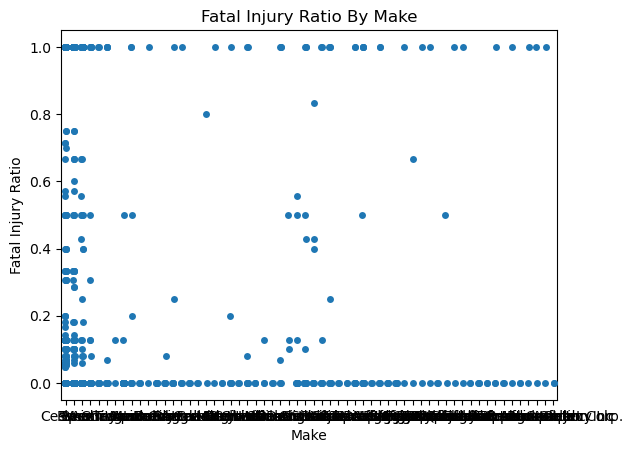

In [679]:
fig, ax = plt.subplots()

sns.stripplot(x='Make', y='Fatal Injury Ratio', data= df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

The number of engines does not seem to effect the fatality ratio the way we thought it might. There's more makes with lower fatalities with only 1 engine. 

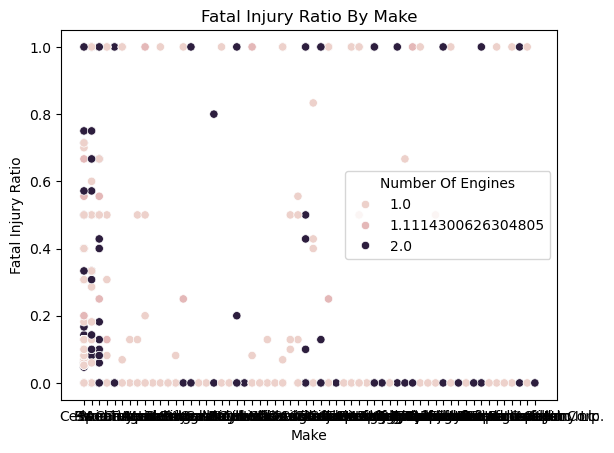

In [681]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Number Of Engines', data= df, ax=ax)
ax.set_title('Fatal Injury Ratio By Make')
plt.savefig('fatal_injury_by_engine.png')

There seems to be some correlation between the weather condition when it is VMC and lower fatality ratios.

## Filtering Down Manufacturers

In [684]:
#Let's just plot the top ten most common makes so we can see the data better and get rid of the manufacturers with less than 10 values
top_ten_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney', 'Cirrus Design Corp', 'Raytheon Aircraft Company', 'Air Tractor', 'Dehavilland', 'Cirrus']
top_ten_df = df[df['Make'].isin(top_ten_makes)]
top_ten_df = top_ten_df.sort_values('Make')
top_ten_df

,Event Date,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
27,1982-01-21,Accident,"DOS PALOS, CA",United States,SPAIN-AIR AIRPORT,Fatal,Substantial,Air Tractor,301,No,...,0.0,1.0,VMC,Takeoff,1.0,Air Tractor 301,0.000000,0.000000,0.000000,1.000000
1023,2013-08-09,Accident,"Dumas, AR",United States,Billy Free Memorial Airport,Fatal,Substantial,Air Tractor,AT-400,No,...,0.0,1.0,VMC,Unknown,1.0,Air Tractor AT-400,0.000000,0.000000,0.000000,1.000000
1296,2019-08-08,Accident,"Sumner, IA",United States,Unknown,Fatal,Destroyed,Air Tractor,AT502,No,...,0.0,0.0,VMC,Unknown,1.0,Air Tractor AT502,1.000000,0.000000,0.000000,0.000000
1241,2018-08-14,Accident,"Northport, WA",United States,Unknown,Fatal,Substantial,Air Tractor,AT802,No,...,1.0,0.0,Unknown,Unknown,1.0,Air Tractor AT802,0.000000,0.000000,1.000000,0.000000
1169,2016-09-01,Accident,"Sorriso, Brazil",Brazil,Santa Anastacia Airport,Fatal,Destroyed,Air Tractor,AT502,No,...,0.0,0.0,VMC,Unknown,2.0,Air Tractor AT502,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2022-07-15,Accident,"Brunswick, GA",United States,BRUNSWICK GOLDEN ISLES,Fatal,Substantial,Raytheon Aircraft Company,400A,No,...,0.0,2.0,VMC,Unknown,2.0,Raytheon Aircraft Company 400A,0.000000,0.000000,0.000000,1.000000
643,2007-10-04,Accident,"Pagosa Springs, CO",United States,Not Applicable,Fatal,Destroyed,Raytheon Aircraft Company,C90A,No,...,1.0,2.0,IMC,Descent,7.0,Raytheon Aircraft Company C90A,0.428571,0.142857,0.142857,0.285714
1198,2017-04-15,Accident,"Richfield, UT",United States,RICHFIELD MUNI,Fatal,Substantial,Raytheon Aircraft Company,B200,No,...,0.0,1.0,VMC,Unknown,1.0,Raytheon Aircraft Company B200,0.000000,0.000000,0.000000,1.000000
1054,2014-05-13,Incident,"Sugar Land, TX",United States,Sugar Land Regional Airport,Fatal,Minor,Raytheon Aircraft Company,400A,No,...,0.0,2.0,UNK,Unknown,2.0,Raytheon Aircraft Company 400A,0.000000,0.000000,0.000000,1.000000


Narrow it down further to the manufacturers with more than 20 values each, anything less than that will be removed because anything less than 20 will be difficult to extract accurate statistical analyses from. This gives us the top 5 makes.

In [686]:
top_five_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney']
filtered_df = top_ten_df[top_ten_df['Make'].isin(top_five_makes)]
filtered_df['Make'].value_counts()

Make
Cessna     619
Piper      322
Beech      174
Grumman     30
Mooney      28
Name: count, dtype: int64

In [687]:
filtered_df

,Event Date,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
128,1982-04-07,Accident,"WINSTON-SALEM, NC",United States,SMITH REYNOLDS,Fatal,Substantial,Beech,65-A90,No,...,0.0,2.0,VMC,Landing,2.0,Beech 65-A90,0.0,0.000000,0.000000,1.0
721,2008-12-14,Accident,"Rocksprings, TX",United States,Unknown,Fatal,Substantial,Beech,C90,No,...,0.0,0.0,VMC,Unknown,1.0,Beech C90,1.0,0.000000,0.000000,0.0
1245,2018-09-03,Accident,"Burbank, CA",United States,Bob Hope,Fatal,Substantial,Beech,200,No,...,0.0,1.0,VMC,Unknown,1.0,Beech 200,0.0,0.000000,0.000000,1.0
727,2008-12-27,Accident,"Fort Myers, FL",United States,Southwest Florida Internationa,Fatal,Substantial,Beech,E18S,No,...,1.0,0.0,VMC,Unknown,1.0,Beech E18S,0.0,0.000000,1.000000,0.0
718,2008-11-23,Accident,"God's Lake Narrows, Canada",Canada,God's Lake Narrows Airport,Fatal,Destroyed,Beech,A100,No,...,0.0,0.0,VMC,Unknown,5.0,Beech A100,0.0,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2012-08-17,Accident,"Holton, KS",United States,Unknown,Fatal,Substantial,Piper,PA-24-260,No,...,2.0,0.0,VMC,Unknown,3.0,Piper PA-24-260,0.0,0.333333,0.666667,0.0
954,2012-06-13,Accident,"Ocilla, GA",United States,Unknown,Fatal,Substantial,Piper,PA-28-180,No,...,0.0,0.0,VMC,Unknown,1.0,Piper PA-28-180,0.0,1.000000,0.000000,0.0
339,1982-08-14,Accident,"KANKAKEE, IL",United States,GREATER KANKAKEE,Fatal,Substantial,Piper,PA-28-151,No,...,0.0,2.0,VMC,Landing,2.0,Piper PA-28-151,0.0,0.000000,0.000000,1.0
956,2012-06-22,Accident,"Metropolis, IL",United States,Metropolis Municipal,Fatal,Substantial,Piper,PA-46-310P,No,...,0.0,1.0,VMC,Unknown,1.0,Piper PA-46-310P,0.0,0.000000,0.000000,1.0


## Understanding the Relationships with Top 5 Manufacturers

The lowest fatal injury ratio is Grumman. We'll look into this further.

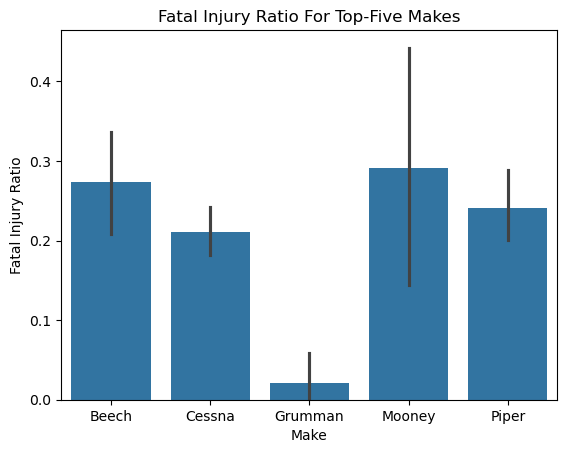

In [690]:
fig, ax = plt.subplots()
sns.barplot(x= 'Make', y='Fatal Injury Ratio', data= filtered_df, ax=ax)
ax.set_title('Fatal Injury Ratio For Top-Five Makes')
plt.savefig('fatality_top_five.png')

There's way more aircrafts with reciprocating engines and turbo props.

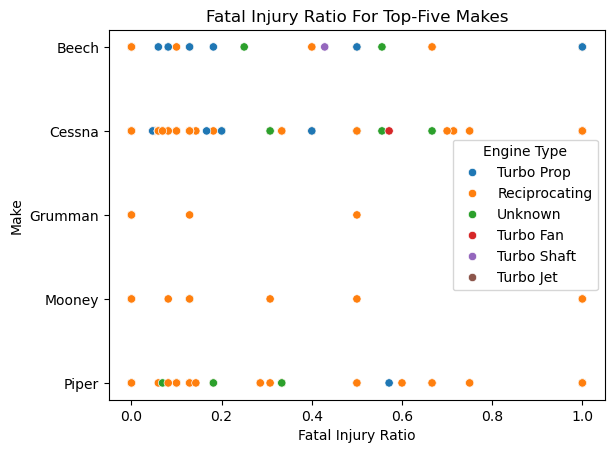

In [692]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Fatal Injury Ratio', y='Make', hue= 'Engine Type', data= filtered_df, ax=ax)
ax.set_title('Fatal Injury Ratio For Top-Five Makes')
plt.savefig('fatality_engines_top_five.png')

In [693]:
#Get rid of the unknown weather values that are left
filtered_df = filtered_df[filtered_df['Weather Condition'] != 'UNK']
filtered_df = filtered_df[filtered_df['Weather Condition'] != 'Unknown']
filtered_df['Weather Condition'].value_counts()

Weather Condition
VMC    917
IMC    158
Name: count, dtype: int64

The distribution of data lies around Substantial Damage more than anything else. It will be important for us to assess how durable an aircraft is based on the survival rate in when there's subsantial damage.

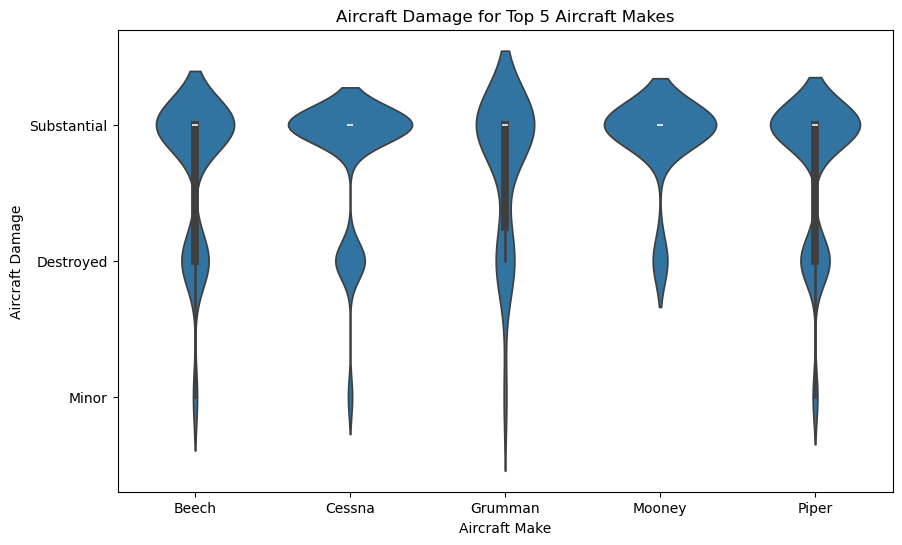

In [695]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Make', y='Aircraft Damage', data= filtered_df)
plt.xlabel('Aircraft Make')
plt.ylabel('Aircraft Damage')
plt.title('Aircraft Damage for Top 5 Aircraft Makes')
plt.show()

When we add weather condition to the mix it looks like Cessna performs well in both good and bad weather conditions.

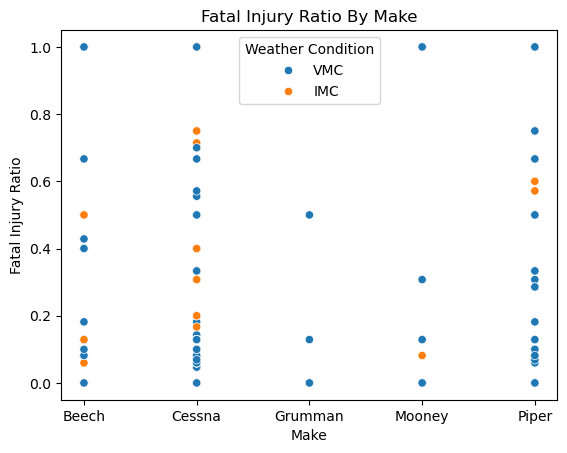

In [697]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Weather Condition', data= filtered_df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

plt.savefig('fatal_injury_weather.png')

- Highest Average Fatality Ratio is happening in Approach, Climb, Maneuvering, Cruise and Go-Around Phases.
- The lowest average fatalities are happening in the Standing, Landing, and Taxi Phases.
- IMC Weather Conditions are more often present with Higher Average Fatality Rate while VMC are present with lower average fatality rates

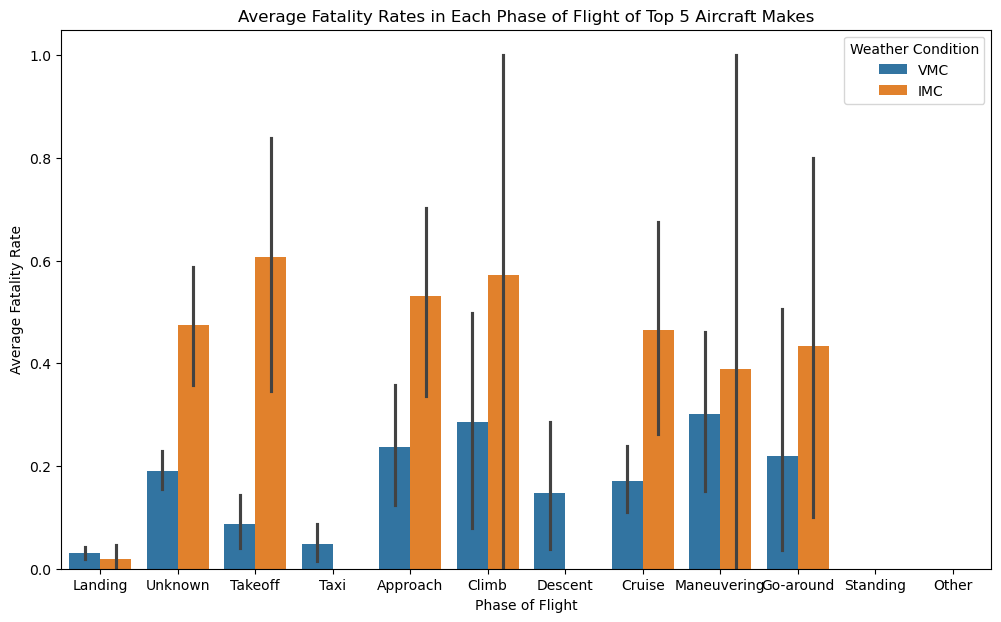

<Figure size 640x480 with 0 Axes>

In [699]:
plt.figure(figsize=(12,7))
sns.barplot(x='Broad Phase Of Flight', y= 'Fatal Injury Ratio', hue= 'Weather Condition', data= filtered_df)
plt.xlabel('Phase of Flight')
plt.ylabel('Average Fatality Rate')
plt.title('Average Fatality Rates in Each Phase of Flight of Top 5 Aircraft Makes')
plt.show()

plt.savefig('avg_fatality_phase_weather.png')

## Creating the Risk Index

We are assessing safety by creating a risk index that takes in a Make & Model and will output a risk index rank (i.e. High, Medium, and Low Risk) and Risk Values, the numeric value between 0 and 1 calculated by the risk scorewe create in our function.

Risk Index Indicators: Average Fatality Rate, Average Fatality with Substantial Aircraft Damage, Median Uninjured Rate, and Average Minor Injury Rate

In [701]:
# Take the groupby mean of uninjured rates for each make-model; 
filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()

,Uninjured Ratio
Make-Model,
Beech 1900,0.500000
Beech 200,0.637363
Beech 35,1.000000
Beech 36,0.750000
Beech 400,0.666667
...,...
Piper PA31-350,1.000000
Piper PA31T,0.000000
Piper PA32R,0.500000


In [702]:
#Let's use this column to start our risk_index_df which will consist of all the risk indicators
risk_index_df = filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df.rename(columns={"Uninjured Ratio": "Average Uninjured Rate"}, inplace=True)
risk_index_df

second = filtered_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df['Average Fatality Rate'] = second['Fatal Injury Ratio']

# Calculate the average fatality rate when there is Substantial damage to the aircraft
substantial_damage_df = filtered_df[filtered_df['Aircraft Damage'] == 'Substantial']
substantial_damage_df
third = substantial_damage_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()

# Add this column to the risk index df
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = third

# Calculate the average minor injury rate 
fourth = filtered_df[['Minor Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fourth

risk_index_df['Average Minor Injury Rate'] = fourth
risk_index_df

fifth = filtered_df[['Serious Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fifth

risk_index_df['Average Serious Injury Rate'] = fifth

In [703]:
#Checking for the missing values and imputing them with the mean them
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()

print(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())

risk_index_df['Average Fatality Rate w/ Substantial Damage']= risk_index_df['Average Fatality Rate w/ Substantial Damage'].fillna(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()

0.07093000750357291


Average Fatality Rate w/ Substantial Damage
False    238
Name: count, dtype: int64

In [704]:
# Our risk index dataframe is built. We will be using this dataframe to input values into our risk index function which will assess
## the risk level as High, Medium, or Low, based on the given conditions.

risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate
Make-Model,,,,,
Beech 1900,0.500000,0.500000,0.000000,0.000000,0.000000
Beech 200,0.637363,0.302198,0.053571,0.049451,0.010989
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000
Beech 36,0.750000,0.000000,0.000000,0.000000,0.250000
Beech 400,0.666667,0.000000,0.000000,0.000000,0.333333
...,...,...,...,...,...
Piper PA31-350,1.000000,0.000000,0.070930,0.000000,0.000000
Piper PA31T,0.000000,1.000000,0.070930,0.000000,0.000000
Piper PA32R,0.500000,0.250000,0.000000,0.000000,0.250000


In [705]:
## We will use the average of the ratios to set our conditions for risk
print(filtered_df['Uninjured Ratio'].mean())
print(filtered_df['Serious Injury Ratio'].mean())
print(filtered_df['Minor Injury Ratio'].mean())
print(filtered_df['Fatal Injury Ratio'].mean())
print(substantial_damage_df['Fatal Injury Ratio'].mean())

0.5941919686716328
0.10234870118732338
0.10682344519052284
0.19663588495052095
0.0830502764855524


In [706]:
#Normalizing the risk data frame: (x-x.min)/(x.max-x.min)

risk_index_df['Average Uninjured Rate'] = (risk_index_df['Average Uninjured Rate'] - risk_index_df['Average Uninjured Rate'].min()) / (risk_index_df['Average Uninjured Rate'].max() - risk_index_df['Average Uninjured Rate'].min())
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = (risk_index_df['Average Fatality Rate w/ Substantial Damage'] - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min()) / (risk_index_df['Average Fatality Rate w/ Substantial Damage'].max() - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min())
risk_index_df['Average Fatality Rate'] = (risk_index_df['Average Fatality Rate'] - risk_index_df['Average Fatality Rate'].min()) / (risk_index_df['Average Fatality Rate'].max() - risk_index_df['Average Fatality Rate'].min())
risk_index_df['Average Minor Injury Rate'] = (risk_index_df['Average Minor Injury Rate'] - risk_index_df['Average Minor Injury Rate'].min()) / (risk_index_df['Average Minor Injury Rate'].max() - risk_index_df['Average Minor Injury Rate'].min())
risk_index_df['Average Serious Injury Rate'] = (risk_index_df['Average Serious Injury Rate'] - risk_index_df['Average Serious Injury Rate'].min()) / (risk_index_df['Average Serious Injury Rate'].max() - risk_index_df['Average Serious Injury Rate'].min())


In [707]:
risk_index_df.describe()

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.594615,0.183655,0.106395,0.166340,0.110836
std,0.293789,0.219902,0.186832,0.241276,0.175800
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447218,0.000000,0.000000,0.000000,0.000000
50%,0.598961,0.097779,0.000000,0.051230,0.047157
75%,0.810282,0.333333,0.106395,0.244091,0.145177
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [708]:
#Have the function take in a make_model in string form and the dataframe
##### 
#####
def risk_index(make_model, risk_index_df):
    # Find the row corresponding to the given Make-Model
    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']
    
    count = 0
    # Apply the risk conditions
    if avg_fatality_rate > .17:
        count += 1
    if avg_serious_injury_rate > .10:
        count += 1
    if avg_fatality_substantial_damage > .03:
        count += 1
    if avg_uninjured_rate < .6:
        count += 1
    if avg_minor_injury < .13:
        count += 1

    # Determine risk level based on count
    if count >= 4:
        return "High Risk"
    elif count == 3:
        return "Medium Risk"
    else:
        return "Low Risk"


In [709]:
risk_index('Beech 200', risk_index_df)

'Medium Risk'

In [710]:
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

An initial look at our risk index shows that something in the data may have skewed the results to be low risk. Let's look into the data a bit more and see what might be causing this. We may need to normalize or standardize the data and possibly give the conditions different weights.

In [712]:
risk_index_df['Risk Index'].value_counts()

Risk Index
Low Risk       134
Medium Risk     64
High Risk       40
Name: count, dtype: int64

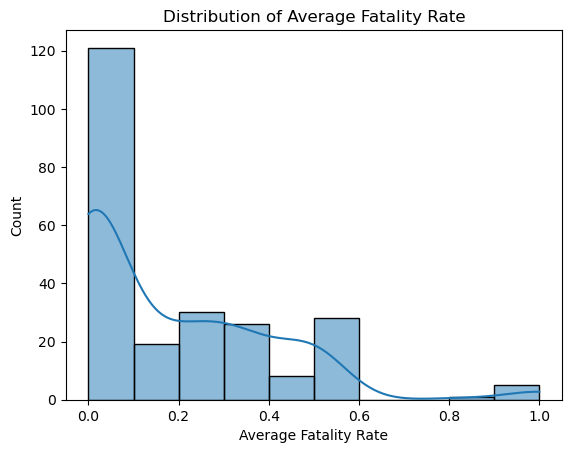

In [713]:
## There are a lot of 0 values for the average fatality rate. Maybe we can give this 
## indicator less weight, or figure out how to standardize the data better when building the risk index function
sns.histplot(risk_index_df['Average Fatality Rate'], bins=10, kde=True)
plt.title('Distribution of Average Fatality Rate')
plt.show()

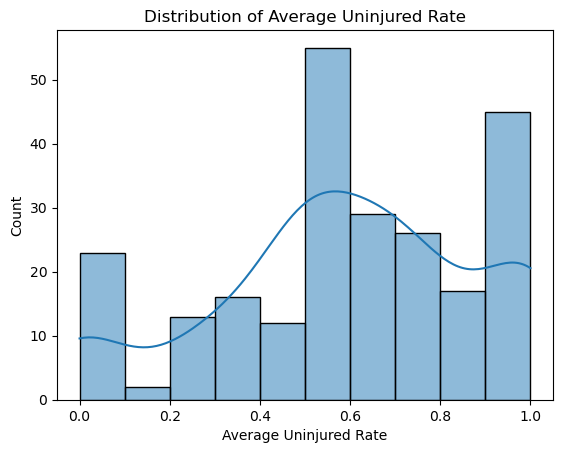

In [714]:
## Most of the values fall around 50% uninjured, we might be able to give this more weight
sns.histplot(risk_index_df['Average Uninjured Rate'], bins=10, kde=True)
plt.title('Distribution of Average Uninjured Rate')
plt.show()

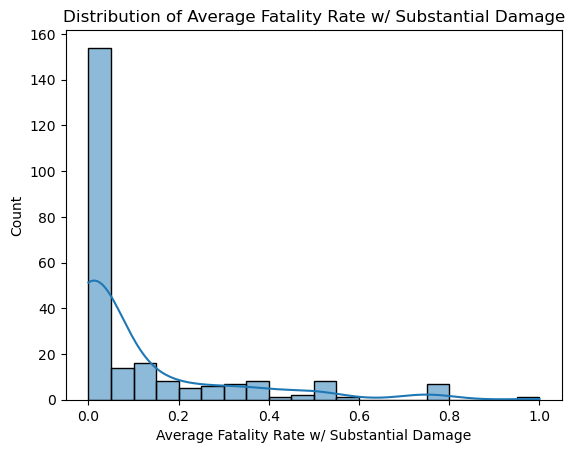

In [715]:
## Again the distribution is skewed to have a low avg fatality rate w substantial damage, we may need to give 
## this less weight in our risk index
sns.histplot(risk_index_df['Average Fatality Rate w/ Substantial Damage'], bins=20, kde=True)
plt.title('Distribution of Average Fatality Rate w/ Substantial Damage')
plt.show()

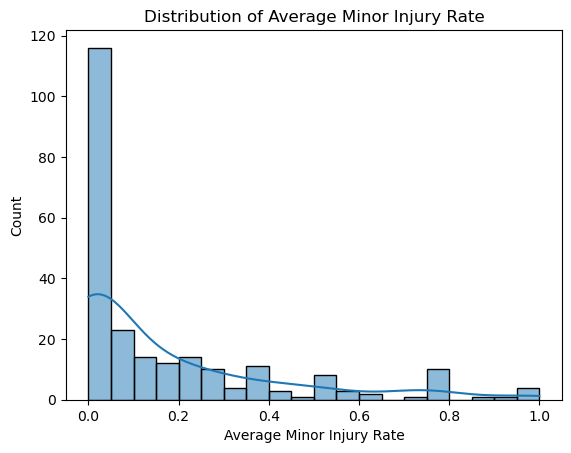

In [716]:
## we may be able to give this more weight in the index, since there is less data showing high rates of minor injuries
sns.histplot(risk_index_df['Average Minor Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Minor Injury Rate')
plt.show()

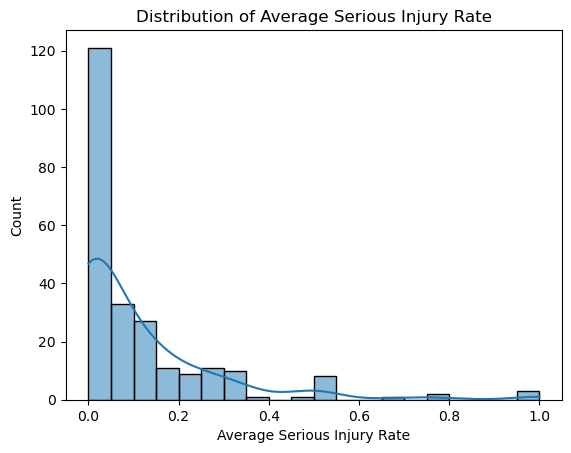

In [717]:
sns.histplot(risk_index_df['Average Serious Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Serious Injury Rate')
plt.show()

Re-do the risk_index function to introduce a weighted scoring system so that the factors with skewed distributions are balanced out:

In [719]:
def risk_index(make_model, risk_index_df):

    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']

    weights = {
        'fatality_rate': .10,
        'serious_injury_rate': .10,
        'minor_injury_rate': .35,
        'substantial_damage_rate': .10,
        'uninjured_rate': .35
}

    score = (
        weights['fatality_rate'] * (avg_fatality_rate > 0.17) +
        weights['serious_injury_rate'] * (avg_serious_injury_rate > 0.10) +
        weights['substantial_damage_rate'] * (avg_fatality_substantial_damage > 0.03) +
        weights['uninjured_rate'] * (avg_uninjured_rate < 0.60) + 
        weights['minor_injury_rate'] * (avg_minor_injury < 0.13)

    )


    
    if score > .7:

        return f"High Risk, {score}"
    elif score > .4:
        
        return f"Medium Risk, {score}"
    else:
  
        return f"Low Risk, {score}"


In [720]:
#run the index column through the updated function
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

In [721]:
#Create new columns to separate the risk rank and value
risk_index_df[["Risk Rank", "Risk Value"]] = risk_index_df["Risk Index"].str.split(",", expand=True)

In [722]:
#There a little less Low Risk values here than before. The original function gave us 97 Low Risk, 60 Medium, and 33 High Risk.
# It seems like our updated function has an effect but it isn't a drastic change, feels just a little more stabilized.

risk_index_df['Risk Rank'].value_counts()

Risk Rank
Medium Risk    106
Low Risk        79
High Risk       53
Name: count, dtype: int64

In [723]:
# Turn the Risk Value column from objects into floats
risk_index_df['Risk Value'] = risk_index_df['Risk Value'].astype(float)
risk_index_df['Risk Value']

Make-Model
Beech 1900          0.80
Beech 200           0.55
Beech 35            0.35
Beech 36            0.45
Beech 400           0.45
                    ... 
Piper PA31-350      0.45
Piper PA31T         0.90
Piper PA32R         0.90
Piper PA46          0.35
Piper PA46-500TP    0.90
Name: Risk Value, Length: 238, dtype: float64

In [724]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
Make-Model,,,,,,,,
Beech 1900,0.500000,0.500000,0.000000,0.000000,0.000000,"High Risk, 0.7999999999999999",High Risk,0.80
Beech 200,0.637363,0.302198,0.080357,0.074176,0.010989,"Medium Risk, 0.55",Medium Risk,0.55
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
Beech 36,0.750000,0.000000,0.000000,0.000000,0.250000,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
Beech 400,0.666667,0.000000,0.000000,0.000000,0.333333,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
...,...,...,...,...,...,...,...,...
Piper PA31-350,1.000000,0.000000,0.106395,0.000000,0.000000,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
Piper PA31T,0.000000,1.000000,0.106395,0.000000,0.000000,"High Risk, 0.9",High Risk,0.90
Piper PA32R,0.500000,0.250000,0.000000,0.000000,0.250000,"High Risk, 0.9",High Risk,0.90


In [725]:
risk_index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Beech 1900 to Piper PA46-500TP
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Average Uninjured Rate                       238 non-null    float64
 1   Average Fatality Rate                        238 non-null    float64
 2   Average Fatality Rate w/ Substantial Damage  238 non-null    float64
 3   Average Minor Injury Rate                    238 non-null    float64
 4   Average Serious Injury Rate                  238 non-null    float64
 5   Risk Index                                   238 non-null    object 
 6   Risk Rank                                    238 non-null    object 
 7   Risk Value                                   238 non-null    float64
dtypes: float64(6), object(2)
memory usage: 24.8+ KB


25% of the data is below a 35% risk value, 50% of data is below 45% risk and 75% is below 65% risk value. The average risk value is 51%.

In [727]:
risk_index_df.describe()

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Value
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.594615,0.183655,0.106395,0.166340,0.110836,0.509664
std,0.293789,0.219902,0.186832,0.241276,0.175800,0.242854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447218,0.000000,0.000000,0.000000,0.000000,0.350000
50%,0.598961,0.097779,0.000000,0.051230,0.047157,0.450000
75%,0.810282,0.333333,0.106395,0.244091,0.145177,0.650000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [776]:
filtered_df['Make-Model'] = filtered_df['Make-Model'].astype(str)

In [778]:
filtered_df['Make-Model'] 

0           Beech 65-A90
1              Beech C90
2              Beech 200
3             Beech E18S
4             Beech A100
              ...       
1070     Piper PA-24-260
1071     Piper PA-28-180
1072     Piper PA-28-151
1073    Piper PA-46-310P
1074     Piper PA-28-180
Name: Make-Model, Length: 1075, dtype: object

## Joining Risk Index and Controlling Variables

In [665]:
# Make a new dataframe that joins the risk index data frame and the variables we want to compare it to 
mm_filtered_df = filtered_df[['Make-Model', 'Weather Condition', 'Make', 'Number Of Engines', 'Aircraft Damage','Engine Type','Broad Phase Of Flight']]
mm_filtered_df

filtered_mm_with_risk = mm_filtered_df.join(
    risk_index_df, 
    on="Make-Model"
)

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight
0,Beech 65-A90,VMC,Beech,2.0,Substantial,Turbo Prop,Landing
1,Beech C90,VMC,Beech,2.0,Substantial,Turbo Prop,Unknown
2,Beech 200,VMC,Beech,2.0,Substantial,Turbo Prop,Unknown
3,Beech E18S,VMC,Beech,2.0,Substantial,Reciprocating,Unknown
4,Beech A100,VMC,Beech,2.0,Destroyed,Turbo Prop,Unknown
...,...,...,...,...,...,...,...
1070,Piper PA-24-260,VMC,Piper,1.0,Substantial,Reciprocating,Unknown
1071,Piper PA-28-180,VMC,Piper,1.0,Substantial,Reciprocating,Unknown
1072,Piper PA-28-151,VMC,Piper,1.0,Substantial,Reciprocating,Landing
1073,Piper PA-46-310P,VMC,Piper,1.0,Substantial,Reciprocating,Unknown


In [782]:
filtered_mm_with_risk.head(2)

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
0,Beech 95-C55,VMC,Beech,2.0,Minor,Reciprocating,Approach,0.333333,0.333333,0.077072,0.000000,0.333333,"High Risk, 1.0",High Risk,1.00
1,Beech 99,VMC,Beech,2.0,Substantial,Turbo Prop,Landing,0.233168,0.103546,0.310637,0.192023,0.471264,"Medium Risk, 0.55",Medium Risk,0.55


## Results of Risk Index

The risk index is directly correlated with Average Fatality Rate.

/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_12011/3437513938.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))


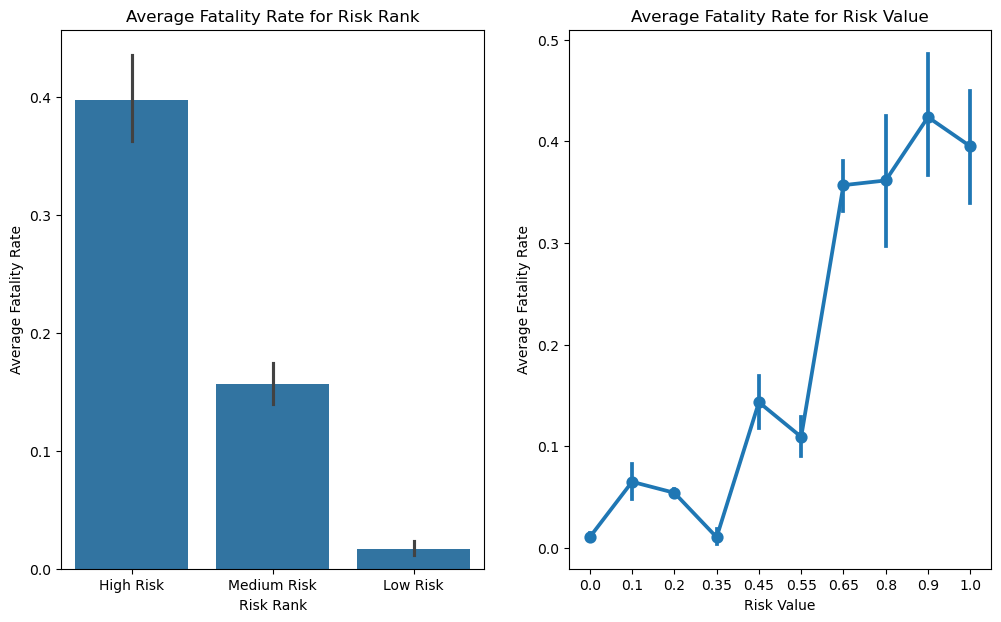

In [465]:
x_vals = list(filtered_mm_with_risk['Risk Value'].unique())

# Look at the relationship between risk index and average fatality rate
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1,2, figsize = (12,7))

sns.barplot(x='Risk Rank' , y='Average Fatality Rate', data = filtered_mm_with_risk, 
            ax = ax[0]).set(title='Average Fatality Rate for Risk Rank')

sns.pointplot(x= 'Risk Value', y='Average Fatality Rate', data = filtered_mm_with_risk, 
             ax = ax[1]).set(title='Average Fatality Rate for Risk Value')
ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))

# ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].set_xlim(auto=True)
ax[1].set_ylim(auto=True)

plt.savefig("avg_fatality_for_risk.png")

The Uninjured Rate is indirectly related to the Risk Index.

/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_12011/1136729980.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))


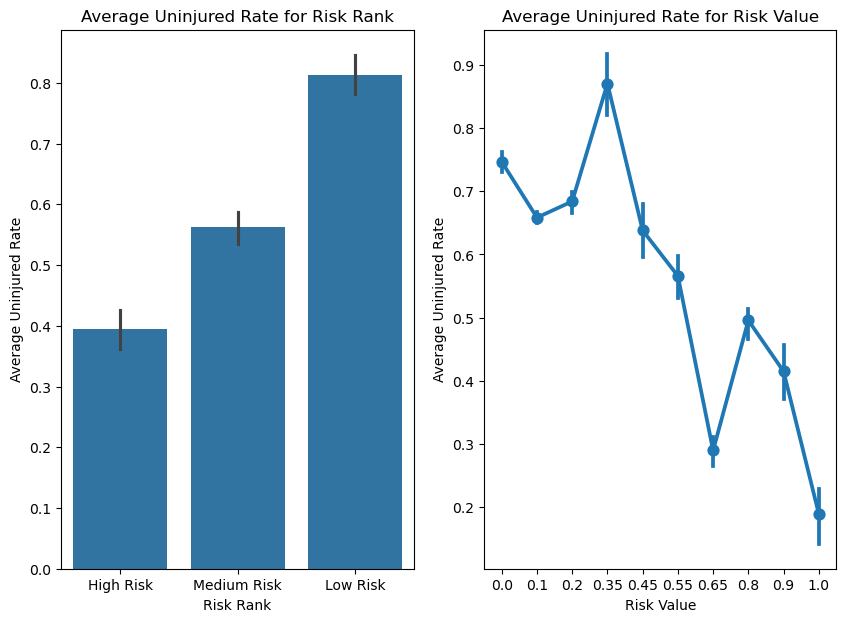

In [469]:
fig, ax = plt.subplots(1,2, figsize = (10,7))

sns.barplot(x='Risk Rank' , y='Average Uninjured Rate', data = filtered_mm_with_risk, 
            ax = ax[0]).set(title='Average Uninjured Rate for Risk Rank')

sns.pointplot(x= 'Risk Value', y='Average Uninjured Rate', data = filtered_mm_with_risk, 
             ax = ax[1]).set(title='Average Uninjured Rate for Risk Value')

ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))

plt.savefig("avg_uninjured_for_risk.png")

Weather Conditions do not have a strong affect on the Low Risk aircrafts, unlike the Medium and High Risk aircrafts.

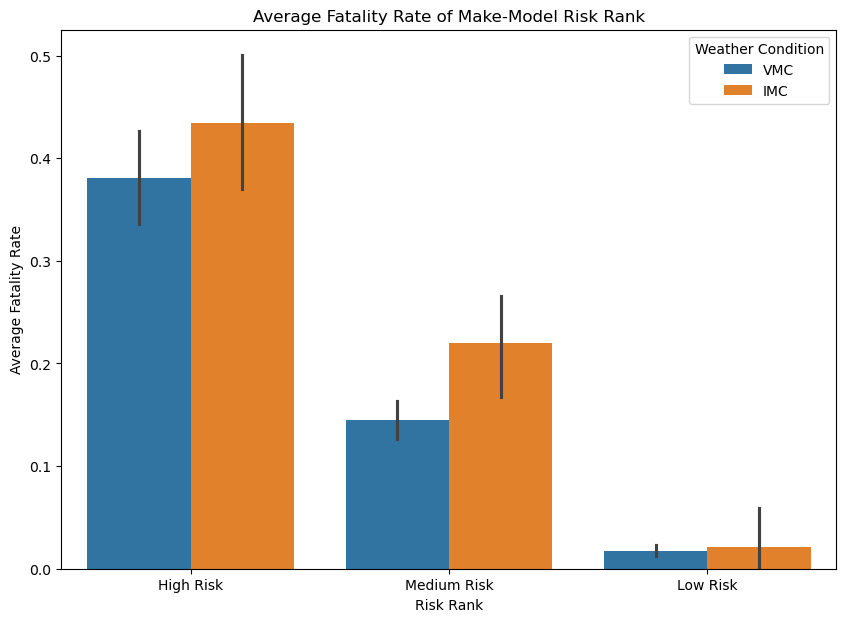

In [227]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Risk Rank' , y='Average Fatality Rate', data = filtered_mm_with_risk, hue= 'Weather Condition').set(title='Average Fatality Rate of Make-Model Risk Rank')

plt.savefig("avg_fatality_risk_make_model.png")

[Text(0.5, 1.0, 'Risk Value By Manufacturer')]

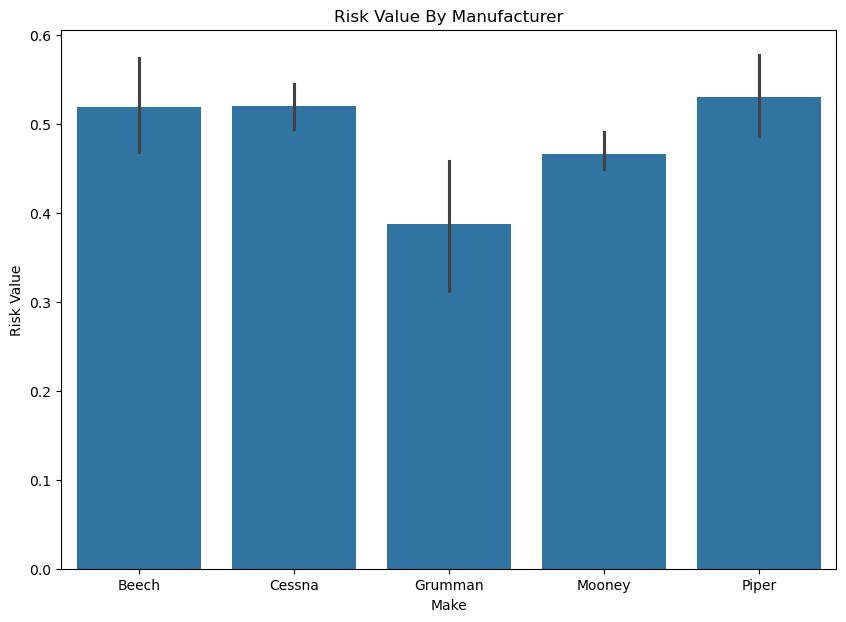

In [810]:
filtered_mm_with_risk['Average Risk Value Per Make'] = filtered_mm_with_risk['Risk Value']
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Make' , y='Risk Value', data = filtered_mm_with_risk).set(title='Risk Value By Manufacturer')
#plt.savefig('risk_fatality_by_make.png')

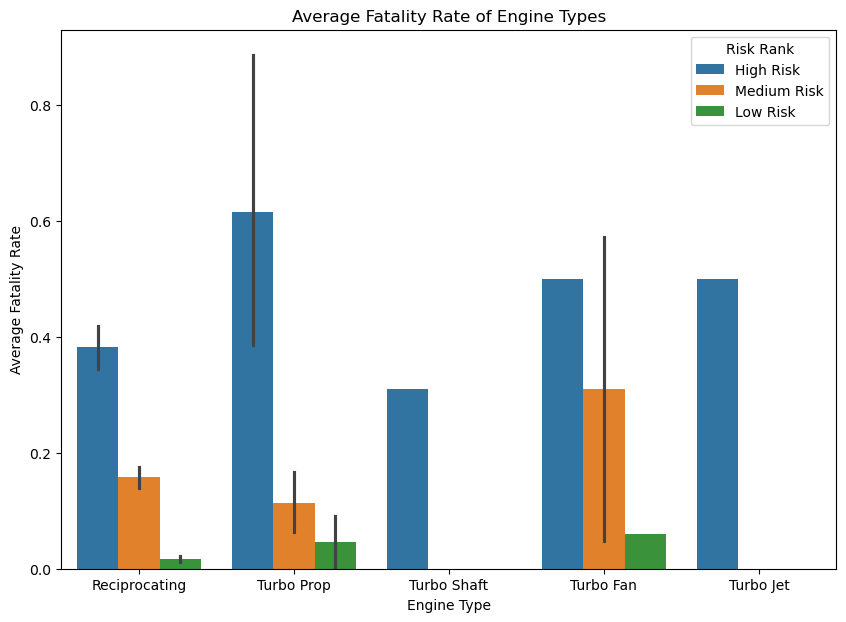

In [303]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Engine Type', y='Average Fatality Rate', data = filtered_mm_with_risk, hue= 'Risk Rank').set(title='Average Fatality Rate of Engine Types')
plt.savefig('risk_fatality_by_engine.png')

## Diving into Low Risk Aircrafts

Create a dataframe with only aircrafts ranked as 'Low Risk'.

In [245]:
low_risk_df = filtered_mm_with_risk[filtered_mm_with_risk['Risk Rank'] == 'Low Risk']
low_risk_df

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
6,Beech A36TC,VMC,Beech,1.0,Substantial,Reciprocating,Approach,1.000000,0.000000,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
7,Beech G18S,VMC,Beech,2.0,Substantial,Reciprocating,Takeoff,1.000000,0.000000,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
8,Beech A23-19,VMC,Beech,1.0,Substantial,Reciprocating,Landing,0.333333,0.000000,0.00000,0.666667,0.000000,"Low Risk, 0.35",Low Risk,0.35
9,Beech V35B,VMC,Beech,1.0,Substantial,Reciprocating,Maneuvering,1.000000,0.000000,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
20,Beech 95-A55,VMC,Beech,2.0,Substantial,Reciprocating,Landing,0.666667,0.000000,0.00000,0.333333,0.000000,"Low Risk, 0.0",Low Risk,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Piper PA-34-200,VMC,Piper,2.0,Substantial,Reciprocating,Landing,1.000000,0.000000,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
542,Piper PA-38,VMC,Piper,1.0,Substantial,Reciprocating,Takeoff,1.000000,0.000000,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
543,Piper PA-23,VMC,Piper,2.0,Substantial,Reciprocating,Cruise,0.833333,0.166667,0.00000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
547,Piper PA-38-112,VMC,Piper,1.0,Substantial,Reciprocating,Cruise,0.500000,0.000000,0.00000,0.500000,0.000000,"Low Risk, 0.35",Low Risk,0.35


Of the low risk aircrafts, there are mostly aircrafts with reciprocating and turbo jet engines.

[Text(0.5, 1.0, 'Risk Value By Manufacturer')]

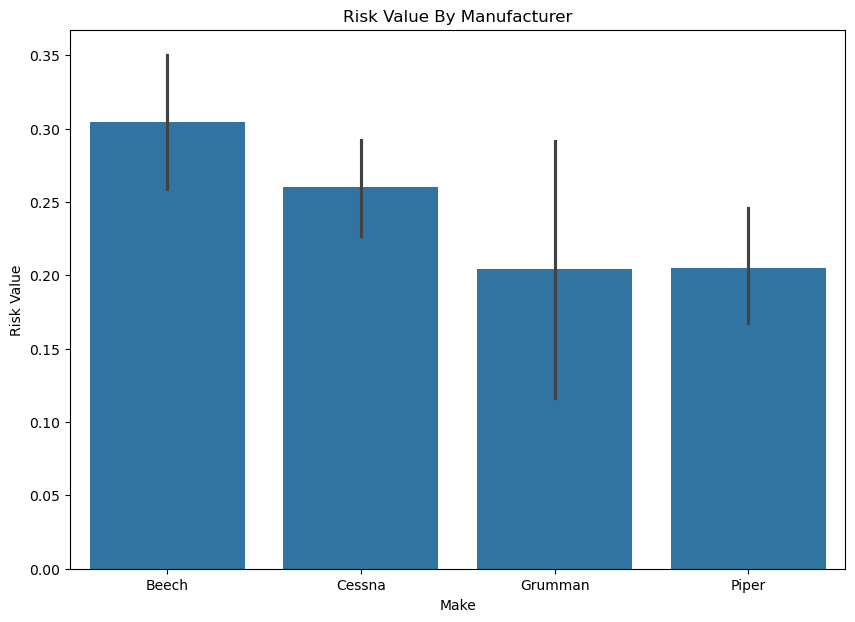

In [835]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Make', y='Risk Value', data = low_risk_df).set(title = 'Risk Value By Manufacturer')
#plt.savefig('risk_val_low_risk_mm_engine.png')

We want to find the aircrafts that have:
    1. Reciprocating, Turbo Prop, or Turbo Fan Engine Types,
    2. Average Fatality Rate <= .02
    3. Risk Value < .05
    4. Two Engines
    5. Average Uninjured Rate > .6

In [345]:
top_aircrafts_df = low_risk_df[((low_risk_df['Engine Type'] == 'Turbo Prop') | 
(low_risk_df['Engine Type'] == 'Reciprocating') | 
(low_risk_df['Engine Type'] == 'Turbo Fan')) &
(low_risk_df['Average Fatality Rate'] < .05) & 
(low_risk_df['Risk Value'] < .05)]

top_aircrafts_df.head()

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
6,Beech A36TC,VMC,Beech,1.0,Substantial,Reciprocating,Approach,1.000000,0.0,0.0,0.000000,0.0,"Low Risk, 0.35",Low Risk,0.35
7,Beech G18S,VMC,Beech,2.0,Substantial,Reciprocating,Takeoff,1.000000,0.0,0.0,0.000000,0.0,"Low Risk, 0.35",Low Risk,0.35
8,Beech A23-19,VMC,Beech,1.0,Substantial,Reciprocating,Landing,0.333333,0.0,0.0,0.666667,0.0,"Low Risk, 0.35",Low Risk,0.35
9,Beech V35B,VMC,Beech,1.0,Substantial,Reciprocating,Maneuvering,1.000000,0.0,0.0,0.000000,0.0,"Low Risk, 0.35",Low Risk,0.35
20,Beech 95-A55,VMC,Beech,2.0,Substantial,Reciprocating,Landing,0.666667,0.0,0.0,0.333333,0.0,"Low Risk, 0.0",Low Risk,0.00


# Filter the above list based on manufacturing dates, physical apperance/interiors to come up with the below list:

- Beech V35B: Stopped Manufacturing
- Beech G18S: Stopped Manufacturing
- Beech A23-19: Stopped Manufacturing
- Piper PA-18: Stopped Manufacturing
- Piper PA-32-300: Stopped Manufacturing
- Piper PA-25-235: Stopped Manufacturing
- Cessna 402B: Stopped Manufacturing
- Piper PA-23: Stopped Manufacturing
- Beech B60: Stopped Manufacturing
- Piper PA-28R-201T : Too Tight, Unsuitable 
- Piper PA-31T: Stopped Manufacturing
- Cessna 172: small interior


# Top Recommendations for Corporate Travel:
- Beech A36TC
- Cessna 208 (Grand Caravan)
- Piper PA-34: spacious: https://www.jetclass.com/fleet-details/piper-pa-34-seneca
- Cessna 172: small interior
- Cessna 182: small interior, 4 seater
- Cessna 206: small, but updated interior, 6 seater: https://generalaviationnews.com/2014/08/13/cessna-stationair-to-sport-new-interior-seating-option/



In [1177]:
#subset_values = ['Piper PA-38-112','Beech 58','Beech 95-C55']
#catplot_df = filtered_mm_with_risk[filtered_mm_with_risk['Make-Model'].isin(subset_values)]
#catplot_df = catplot_df.iloc[[0,1,13]]

In [1173]:


# Select specific rows
#row1 = catplot_df.iloc[12]
#row2 = catplot_df.iloc[1]
#row3 = catplot_df.iloc[0]

# Create a new DataFrame from selected rows
#new_df = pd.concat([row1, row2, row3])
#new_df

In [1175]:
#sns.catplot(x = 'Weather Condition', y = 'Risk Value', kind = 'box', col= 'Make-Model', data =catplot_df)

In [1125]:
#heatmap_df = filtered_mm_with_risk

#sns.heatmap(heatmap_df, cmap ='rocket', annot=True, vmin=0, vmax=1)